# Homework: Regresión Lineal (2024-05-30)
Por: Ángela Daniela Córdoba Álvarez

Hacer regresión para una sola columna $y$ con cualquier dataset: iniciar con 1 sola variable independiente($x$: simple), y luego con varias variables independientes ($x_1$, $x_2$, $x_3$, etc…: múltiple)

In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Creamos un dataset, en este caso, enfocado a la medicina
# Tomamos un dataset del Pima Indians Diabetes
x = [50,31,32,21,33,30,26,29,53,54,34,30,23,32,34,23,30,22,43,36]
y = [148,85,183,89,137,78,97,189,175,80,105,103,115,94,150,184,87,92,122,121]

data_dict = {"Edad (años)":x,
             "Nivel glucosa (mg/dL)":y}

# Convertimos el diccionario en un dataframe
df = pd.DataFrame(data_dict)
df # Lo imprimimos

,Edad (años),Nivel glucosa (mg/dL)
0,50,148
1,31,85
2,32,183
3,21,89
4,33,137
5,30,78
6,26,97
7,29,189
8,53,175
9,54,80


In [ ]:
# Cálculo nuevas columnas
df["xy"] = df["Edad (años)"] * df["Nivel glucosa (mg/dL)"]
df["x2"] = df["Edad (años)"] ** 2
df

,Edad (años),Nivel glucosa (mg/dL),xy,x2
0,50,148,7400,2500
1,31,85,2635,961
2,32,183,5856,1024
3,21,89,1869,441
4,33,137,4521,1089
5,30,78,2340,900
6,26,97,2522,676
7,29,189,5481,841
8,53,175,9275,2809
9,54,80,4320,2916


In [ ]:
# Hallamos también la suma total de cada columna
suma_x = df["Edad (años)"].sum()
suma_y = df["Nivel glucosa (mg/dL)"].sum()
suma_xy = df["xy"].sum()
suma_x2 = df["x2"].sum()

print("Suma de x:", suma_x)
print("Suma de y:", suma_y)
print("Suma de xy:", suma_xy)
print("Suma de x2:", suma_x2)

Suma de x: 666
Suma de y: 2434
Suma de xy: 82100
Suma de x2: 23980


El siguiente paso es hallar la pendiente y el punto de corte de acuerdo al dataset dado.

In [ ]:
n = len(df)
m = ((n * suma_xy) - (suma_x * suma_y)) / ((n * suma_x2) - (suma_x ** 2))
print("Pendiente:", m)

Pendiente: 0.5814005104871823


In [ ]:
b = (suma_y / n) - (m * (suma_x / n))
print("Punto de corte:", b)

Punto de corte: 102.33936300077683


In [ ]:
x_final = df["Edad (años)"].max()
y_final = m * x_final + b
print("Punto final:", y_final)

Punto final: 133.73499056708468


In [ ]:
# Crear un nuevo dataset para los extremos de la línea
x_final = [0,x_final]
y_final = [b,y_final]

dict_f = {"xf":x_final,
               "yf":y_final}

df1 = pd.DataFrame(dict_f)
df1

,xf,yf
0,0,102.339363
1,54,133.734991


Hacemos el gráfico de dispersión.

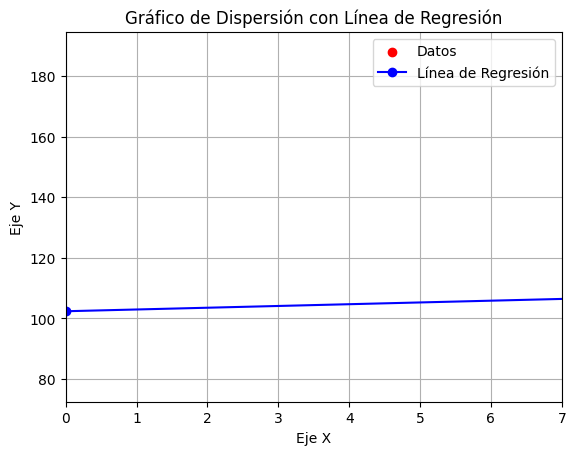

In [ ]:
# Crear la figura y el eje
fig, ax = plt.subplots()

# Gráfico de dispersión
ax.scatter(x, y, label='Datos', color='red')
ax.plot(x_final, y_final, label='Línea de Regresión', marker='o', color='blue')

# Etiquetas y título
plt.title('Regresión Lineal Simple')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
ax.set_xlim(0, 7)
ax.set_title('Gráfico de Dispersión con Línea de Regresión')
ax.grid(True)
plt.grid(True)
ax.legend()

# Mostrar el gráfico
plt.show()


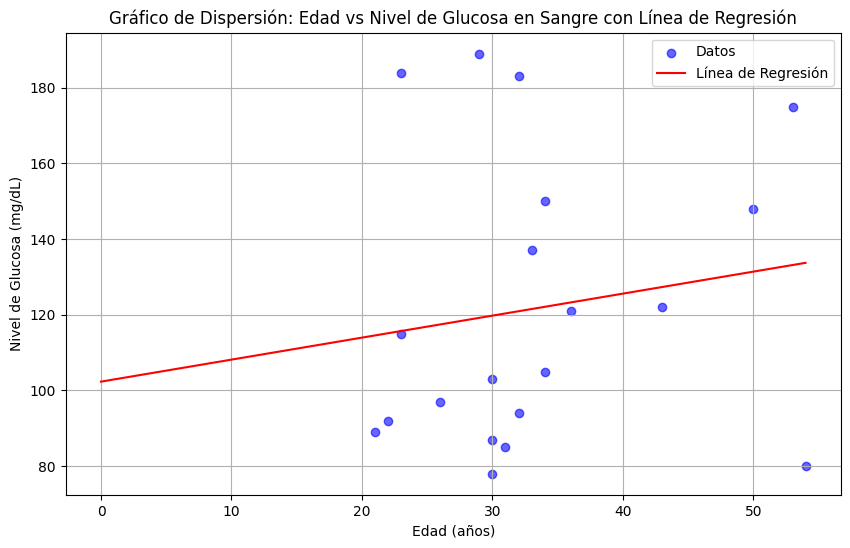

In [ ]:
# Crear el gráfico de dispersión con la línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(df["Edad (años)"], df["Nivel glucosa (mg/dL)"], color='b', alpha=0.6, label='Datos')
plt.plot(df1["xf"], df1["yf"], color='r', label='Línea de Regresión')
plt.title('Gráfico de Dispersión: Edad vs Nivel de Glucosa en Sangre con Línea de Regresión')
plt.xlabel('Edad (años)')
plt.ylabel('Nivel de Glucosa (mg/dL)')
plt.legend()
plt.grid(True)
plt.show()

Continuamos con el problema presentado al final del vídeo, acerca de hallar los diferentes $S_r$: la suma de los cuadrados del residual.

In [ ]:
# Cálculo S_r
df["y_pred"] = m * df["Edad (años)"] + b # Son los valores predichos
df["sr"] = (df["Nivel glucosa (mg/dL)"] - df["y_pred"]) # Halla el residual (diferencia entre los valores observados y predichos)
df["sr2"] = df["sr"] ** 2 # Halla el residual al cuadrado
df["sr2"].sum() # Halla S_r sumando los cuadrados de los residuos
print("Suma de cuadrados del residual:", df["sr2"].sum())

# Hecho por comprensión
sumaa_f =sum([(y[i] - (m * x[i] + b)) ** 2 for i in range(n)])
print("SUMA:", sumaa_f)

# Hecho con for
suma_f=0
for i in range(n):
    residuo =(y[i]-(m*x[i]+b))**2
    suma_f += residuo
print("SUMA:",suma_f)

Suma de cuadrados del residual: 26329.008545111534
SUMA: 26329.00854511153
SUMA: 26329.00854511153


In [15]:
sf = suma_f/n
print("Sr_romedio:", sf)

Sr_romedio: 1316.4504272555764


In [18]:
rmse = sf ** 0.5
rmse_n = rmse/n
print("Raíz de la media del error cuadrático medio:", rmse_n)

Raíz de la media del error cuadrático medio: 1.8141460988958251
